문제2] 1차원 데이터에 대해 탐색적 데이터 분석(EDA)을 수행 해보자.   조건은 아래와 같다.
- 1. 데이터 세트는 100개의 데이터 포인트로 구성된 평균 길이가 5.5 단위이고 표준 편차가 2.0 단위인 정규 분포를 따르는 것으로 가정한다.
- 2. 요약 통계 계산 : 평균, 중앙값, 표준 편차 및 분산을 계산한다.
- 3. 분포를 시각화하기 위해 히스토그램 생성하고  잠재적 이상값을 식별하기 위해 상자 그림을 구성한다.
- 4. 데이터 정규화
    - 평균이 0, 표준편차가 1이 되도록 데이터를 표준화한다.
    - 최소-최대 정규화를 사용하여 데이터를 정규화하여 데이터를 0에서 1 사이로 조정한다
    - 평균 정규화를 적용하여 데이터를 0을 중심으로 하고 범위에 따라 크기를 조정한다.
- 5. 정규화 후 시각화
    - 히스토그램을 사용하여 표준화 및 정규화된 데이터를 시각화한다.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli,binom,norm

In [49]:
#1
mean= 5.5
var = 2.0

data = np.random.normal(mean,var,100)

In [50]:
#2 
data.mean()

5.201001991462594

In [51]:
np.median(data)

5.03512395508076

In [45]:
np.std(data)

1.8209633080330547

In [46]:
np.var(data)

3.3159073692026855

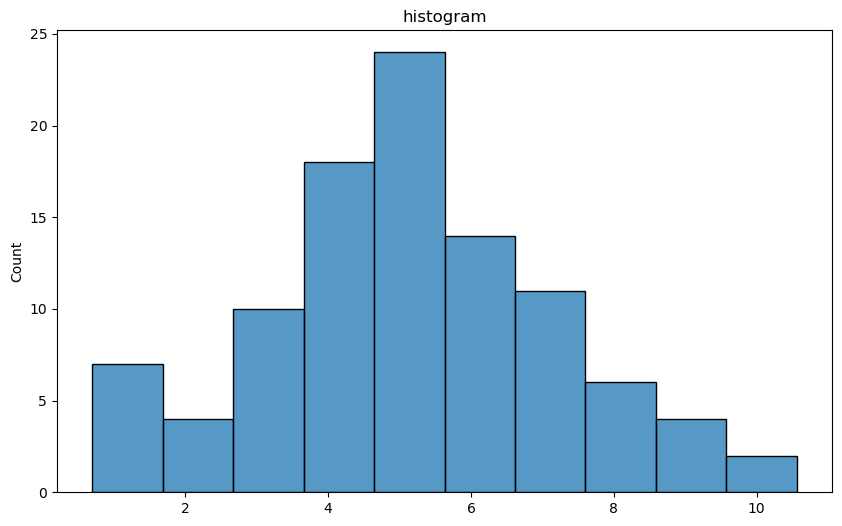

In [57]:
#3
plt.figure(figsize=(10,6))
sns.histplot(data)
plt.title("histogram")
plt.show()

In [58]:
#4 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler =StandardScaler()
std_data = scaler.fit_transform(data.reshape(-1,1)).flatten()

min_max_scaler = MinMaxScaler()

min_max_normalized_data = min_max_scaler.fit_transform(data.reshape(-1,1)).flatten()
mean_normalized_data = (data - np.mean(data)) / (np.max(data) - np.min(data))

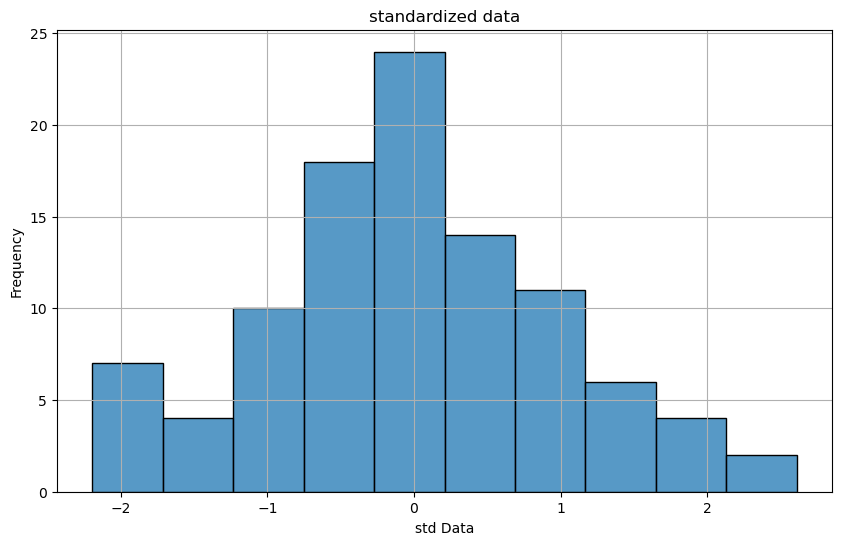

In [62]:
#5
plt.figure(figsize=(10,6))
sns.histplot(std_data, bins = 10)
plt.title("standardized data")
plt.xlabel("std Data")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

문제3] 데이터를 로드해서 데이터의 관계 지표를 나타내고 시각화 해보자
 - 1.Seaborn의 내장기능을 사용해서 Iris 데이터를 로드 한다
 - 2.데이터 기본 EDA를 구현한다
 - 3.정규화 표준화를 구현한다
 - 4.정규화 표준화된 데이터 시각화 한다
 - 5.상관 행렬 시각화를 구현한다
 - 6.관계가 있는 산점도를 생성한다
 - [관찰] 히트맵과 산점도를 확인 후 붓꼬의 다양한 특징이 서로 어떻게 연관되는지 확인 한다. 기능 간의 강한관계를 찾아본다
 - 결과물 : 1) 기본 EDA 결과, 2) 정규화,표준화 시각화 3) 주석이 달린 상관계수의 상관 행렬의 히트맵, 4) 산점도 5) 관찰 내용 기록지

In [66]:
#1
iris_data = sns.load_dataset('iris')

In [86]:
sepal_length_np = np.array(iris_data['sepal_length'])
sepal_width_np = np.array(iris_data['sepal_width'])
petal_length_np = np.array(iris_data['petal_length'])
petal_width_np = np.array(iris_data['petal_width'])

In [88]:
#2
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
#3
scaler = StandardScaler()
standard_data = scaler.fit_transform(iris_data.iloc[:,:-1])
standard_df = pd.DataFrame(standard_data,columns=iris_data.columns[:-1])

minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(iris_data.iloc[:,:-1])
minmax_df = pd.DataFrame(minmax_data,columns=iris_data.columns[:-1])

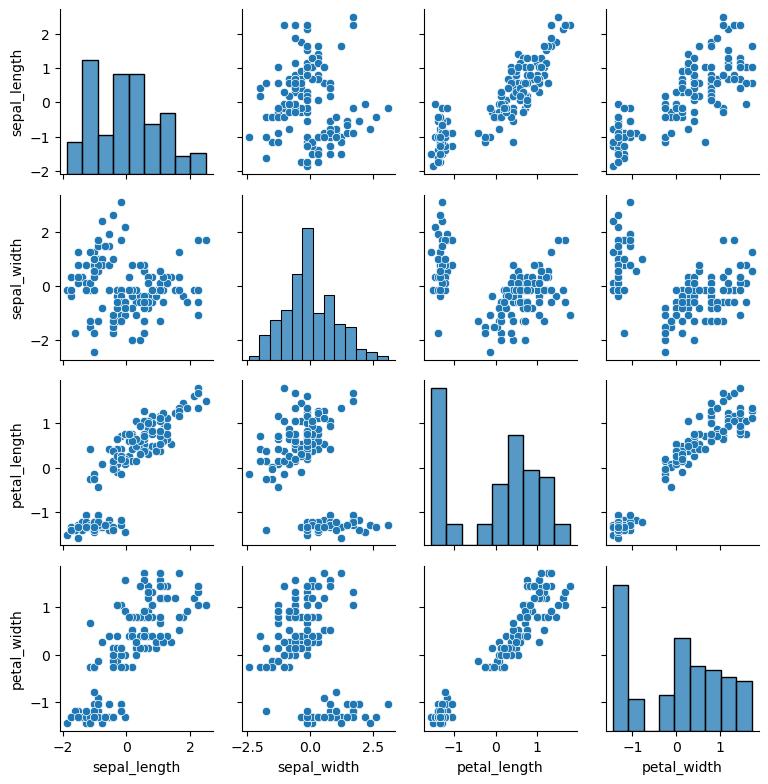

In [111]:
#4
g= sns.PairGrid(standard_df,height=2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: >

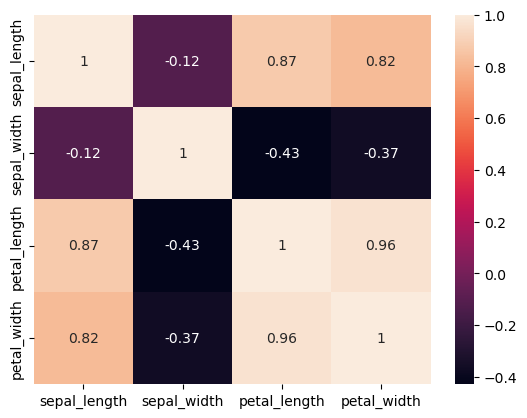

In [102]:
#5
iris_corr = iris_data.corr(numeric_only=True)
sns.heatmap(iris_corr, annot=True)

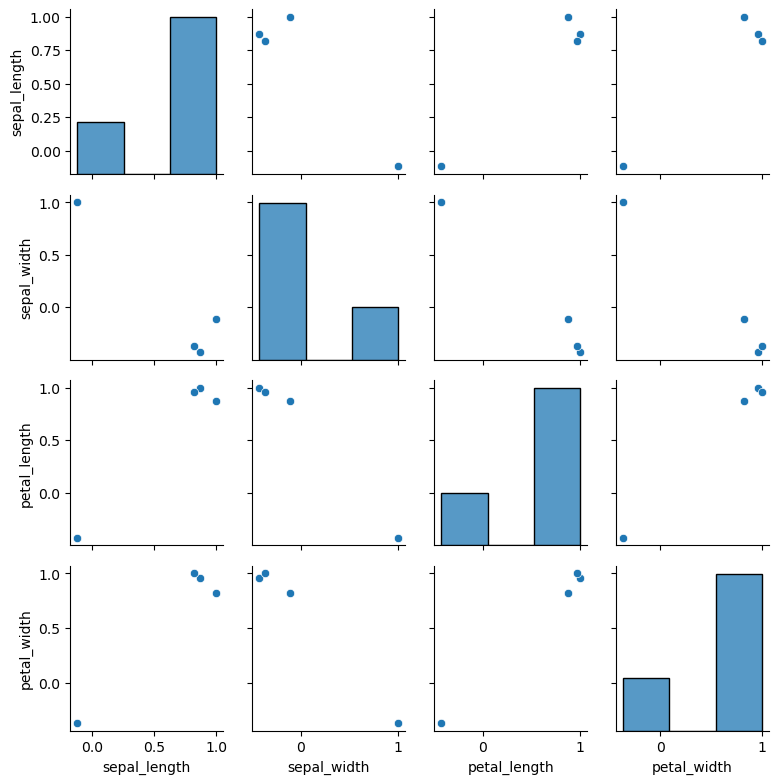

In [112]:
#6
g = sns.PairGrid(iris_corr,height=2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
#결과
